In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def read_raw_arrays(f):
    with open(f) as linetxt:
        return np.array([
            np.array(li.split(','), dtype=np.float) 
            # Each line is a character
            for li in linetxt.readlines()
        ])
           
# emotion of a female characters
data_female_emotion = read_raw_arrays('data/metadata/female_emotion.txt')
# cumulative emotion of a female characters
data_female_cum     = read_raw_arrays('data/metadata/female_cum.txt')
# emotion of a male characters
data_male_emotion   = read_raw_arrays('data/metadata/male_emotion.txt')
# cumulative emotion of a male characters
data_male_cum       = read_raw_arrays('data/metadata/male_cum.txt')

print(
    len(data_female_emotion),
    len(data_female_cum    ),
    len(data_male_emotion  ),
    len(data_male_cum      ),
)

7226 7226 7226 7226


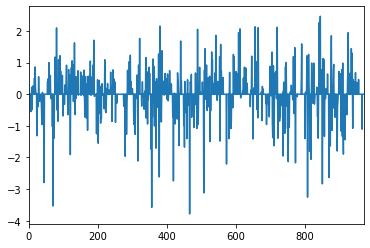

In [20]:
%matplotlib inline
pd.Series(data_female_emotion[0]).plot()

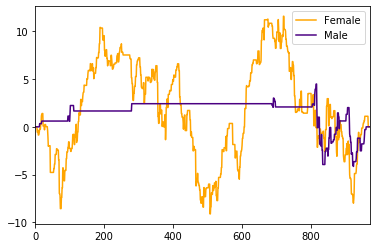

In [28]:
plt.figure()
pd.Series(data_female_cum[0]).plot(c='orange')
pd.Series(data_male_cum[0]).plot(c='indigo')
plt.legend(['Female', 'Male'])
plt.show()